# BPTK-Py - A Simulation Library for Python

Simple, yet powerful simulation library for System Dynamics and Agent-Based Modelling.

It comes with a Domain Specific Language in Pyhton that helps you define

First, let's import the library:

In [3]:
from BPTK_Py import bptk
bptk = bptk()

Now BPTK is ready to run simulation scenarios as defined in [scenarios/](scenarios)

A scenario manager is a simple JSON file that contains information where to find the simulation model and configures simulation scenarios:

```json
{
    "smSimpleProjectManagement":{
    "source":"simulation_models/sd_simple_project.itmx",
    "model":"simulation_models/sd_simple_project",
    "base_constants": {
          "deadline": 100,
          "effortPerTask": 1,
          "initialOpenTasks": 100,
          "initialStaff": 1
    },
    "scenarios": {
      "base": {
      },
      "scenario100": {
          "constants":{  
            "initialOpenTasks" : 100
          }
     } 
    }
 }
```


__XMILE (Stella / iThink) models__ are parsed into Python code and continously monitored for change and re-parsed on change.

Let us check out the plotting capabilities:

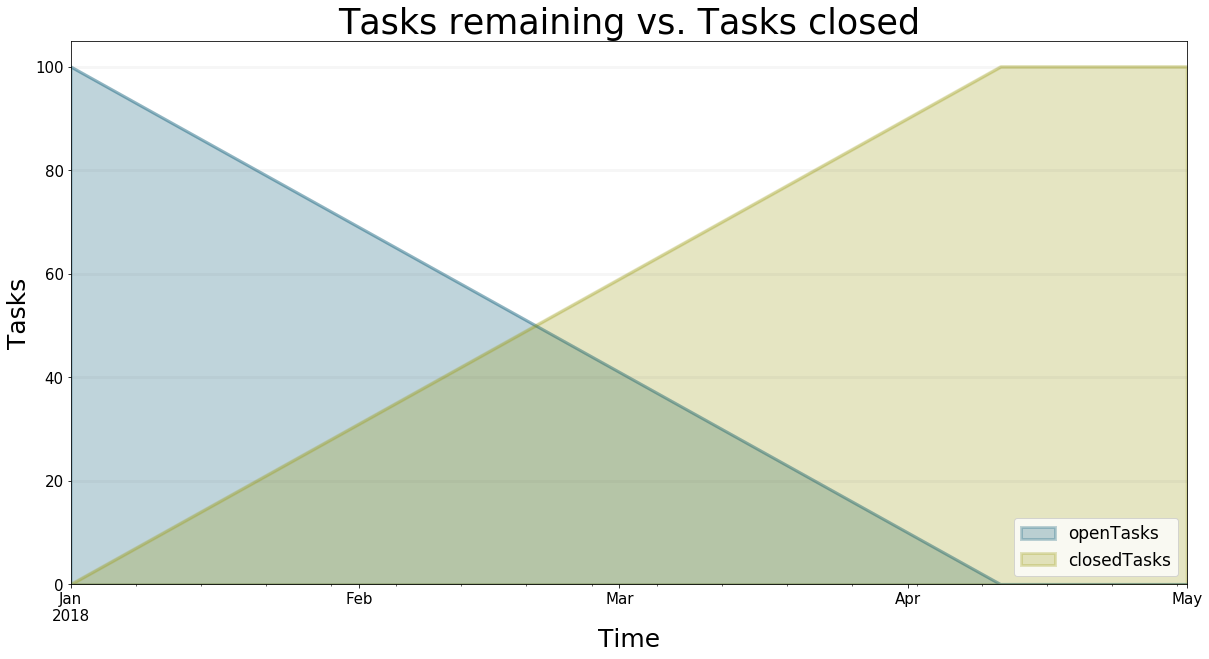

In [60]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario100"], 
    equations=['openTasks','closedTasks'],
    title="Tasks remaining vs. Tasks closed",
    freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks"
)

# Define the model in the SD DSL (Domain Specific Language)

The SD DSL can also be used to build the model, directly in Python:

In [46]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

## The Base Model object
model = Model(starttime=0.0,stoptime=120.0,dt=1.0,name='DSLSimpleProjectManagament')

## Stocks
openTasks = model.stock("openTasks")
closedTasks = model.stock("closedTasks")
staff = model.stock("staff")

## Flows
completionRate = model.flow("completionRate")

## Converters
currentTime = model.converter("currentTime")
remainingTime = model.converter("remainingTime")
schedulePressure = model.converter("schedulePressure")
productivity = model.converter("productivity")

## Constants 
deadline = model.constant("deadline")
effortPerTask = model.constant("effortPerTask")
initialStaff = model.constant("initialStaff")
initialOpenTasks = model.constant("initialOpenTasks")


## Stock Initial Values
closedTasks.initial_value = 0.0
staff.initial_value = initialStaff
openTasks.initial_value = initialOpenTasks 

## Constants Values
deadline.equation = 100.0
effortPerTask.equation = 1.0
initialStaff.equation = 1.0
initialOpenTasks.equation = 100.0

## Equations
currentTime.equation=sd.time() # returns the current t

## Equations can be defined with standard operators and written just like a mathematical equation

remainingTime.equation = deadline - currentTime
openTasks.equation = -completionRate
closedTasks.equation = completionRate
schedulePressure.equation = sd.min(( openTasks* effortPerTask )/( staff * sd.max(remainingTime,1)),2.5)
productivity.equation = sd.lookup(schedulePressure,"productivity")
completionRate.equation = sd.max(0.0, sd.min(openTasks, staff*(productivity/effortPerTask)))

## Add a graphical Function:
model.points["productivity"] = [
    [0,0.4],
    [0.25,0.444],
    [0.5,0.506],
    [0.75,0.594],
    [1,1],
    [1.25,1.119],
    [1.5,1.1625],
    [1.75,1.2125],
    [2,1.2375],
    [2.25,1.245],
    [2.5,1.25]
]

# Set the deadline to 100
deadline.equation = 100.0

__Now we can easily register the model with BPTK and plot simulation results:__

In [61]:

bptk.register_model(model)


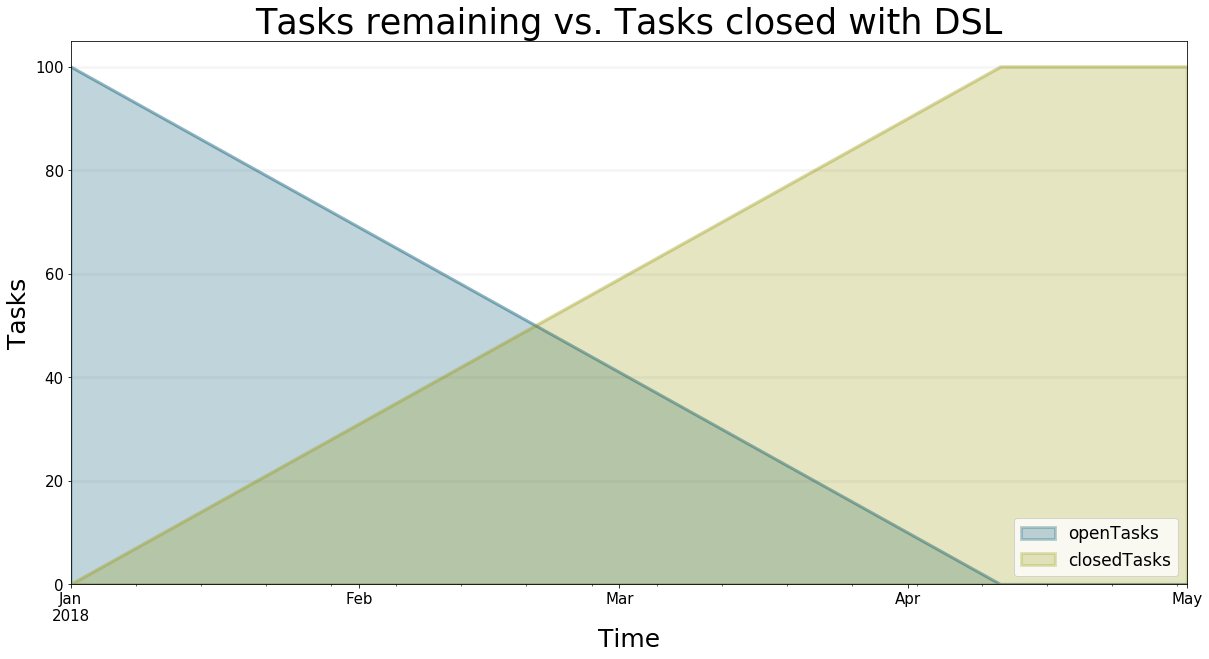

In [63]:
bptk.plot_scenarios(
    scenario_managers=["smDslsimpleprojectmanagament"],
    scenarios=["base"], 
    equations=['openTasks','closedTasks'],
    title="Tasks remaining vs. Tasks closed with DSL",
    freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks"
)

# Agent-Based Model


In [ ]:
bptk.plot_scenarios(
    scenario_managers=["ABMsmSimpleProjectManagement"],
    kind="area",
    scenarios=["scenario100"],
    title="Tasks remaining vs. Tasks closed using ABM",
    agents=["task"],
    agent_states=["open","closed"],

)